In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Credit_Card_Fraud.txt', delimiter=',')  
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.00,0.0


In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

44

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Class'].value_counts() # Will not be surprised if the model is overfitting. 

Class
0.0    11571
1.0       49
Name: count, dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,11620.0,7714.292169,5964.064981,0.000000,2476.750000,6339.500000,11910.500000,19915.000000
V1,11620.0,-0.215333,1.557422,-27.670569,-0.982768,-0.346136,1.159721,1.960497
V2,11620.0,0.271474,1.303580,-34.607649,-0.258310,0.262178,0.886053,9.067613
V3,11620.0,0.899107,1.273555,-21.405836,0.417286,0.951225,1.616689,4.101716
V4,11620.0,0.279220,1.469681,-4.657545,-0.618072,0.213029,1.152640,11.927512
V5,11620.0,-0.078783,1.185496,-32.092129,-0.680091,-0.178827,0.347758,34.099309
V6,11620.0,0.137201,1.305930,-23.496714,-0.623742,-0.152138,0.505700,21.393069
V7,11620.0,-0.110275,1.129508,-26.548144,-0.582500,-0.088246,0.439539,34.303177
V8,11620.0,-0.050170,1.228498,-23.632502,-0.186015,0.011522,0.265518,5.499963
V9,11620.0,0.893153,1.182148,-7.175097,0.181498,0.883566,1.570087,10.392889


In [13]:
fraud_percentage = (df['Class'].value_counts()[1]/(df['Class'].value_counts()[0] + df['Class'].value_counts()[1]))*100
print(f"Percentage of Fraud transactions is {fraud_percentage:.4f}")

Percentage of Fraud transactions is 0.4217


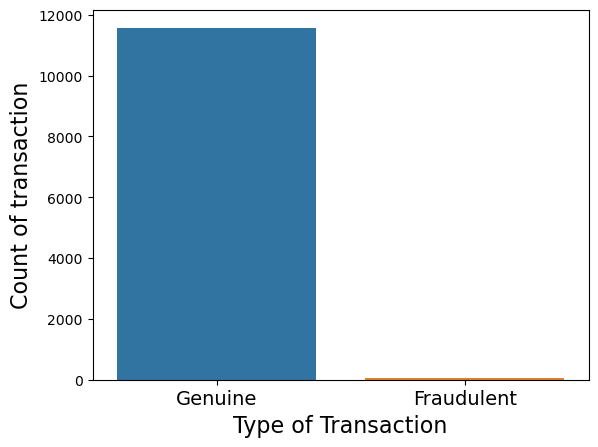

In [14]:
sns.countplot(x=df['Class'])
plt.xlabel("Type of Transaction",fontsize=16)
plt.ylabel("Count of transaction",fontsize=16)
plt.xticks(range(2),['Genuine','Fraudulent'], fontsize=14)
plt.show()

In [15]:
df = df.drop(columns=['Time'], axis=1)

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=42)

In [21]:
ss =StandardScaler()

In [22]:
df["NormalizedAmount"] = ss.fit_transform(df["Amount"].values.reshape(-1, 1)) # type: ignore

In [23]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [24]:
models = [
            ["DecisionTreeClassifier", DecisionTreeClassifier()],
            ["RandomForestClassifier", RandomForestClassifier()]
]

results = []

for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    results.append([name, accuracy_score(y_test,y_pred)])
    print(name)
    print(confusion_matrix(y_test,y_pred))

final_result = pd.DataFrame(results,columns=["Model", "Accuracy Score"], index=None).sort_values(by="Accuracy Score", ascending=False)
final_result

DecisionTreeClassifier
[[3465    3]
 [   2   17]]
RandomForestClassifier
[[3468    0]
 [   0   19]]


,Model,Accuracy Score
1,RandomForestClassifier,1.000000
0,DecisionTreeClassifier,0.998566


This is an clear case of unbalanced data. Therefore our model is able to predict 100%. Keep in mind that is not an case of overfitting. Let us try to solve using SMOTE.

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
over = SMOTE(sampling_strategy=1) # type: ignore
x_train_resampled, y_train_resampled = over.fit_resample(x_train, y_train) # type: ignore

In [28]:
y_train_resampled.value_counts()

Class
0.0    8103
1.0    8103
Name: count, dtype: int64

In [29]:
models = [
            ["DecisionTreeClassifier", DecisionTreeClassifier()],
            ["RandomForestClassifier", RandomForestClassifier()]
]

results = []

for name, model in models:
    model.fit(x_train_resampled,y_train_resampled)
    y_pred = model.predict(x_test)
    results.append([name, accuracy_score(y_test,y_pred)])
    print(name)
    print(confusion_matrix(y_test,y_pred))

final_result = pd.DataFrame(results,columns=["Model", "Accuracy Score"], index=None).sort_values(by="Accuracy Score", ascending=False)
final_result

DecisionTreeClassifier
[[3463    5]
 [   4   15]]
RandomForestClassifier
[[3467    1]
 [   2   17]]


,Model,Accuracy Score
1,RandomForestClassifier,0.999140
0,DecisionTreeClassifier,0.997419


Even after SMOTE we are getting 100% accuracy which is a sign that SMOTE is not helping here. The dataset itself is unbalanced or biased. 

# Conclusion:

No model is having the best performance since the dataset itself is biased. 